## Gaussian Transformation

Some machine learning models like linear and logistic regression assume that the variables are normally distributed. others benefit from 'Gaussian-like' distributions, as in such distributions the observations of X avaliable to predict Y vary across a greater range of values. Thus, Gaussian distributed variables may boost the machine learning algorithm perfomance.

If a variable is not normally distributed, sometimes it is possible to find a mathematical transformation so that the transformed variable is Gaussian.

### Possible way to transform variables so that they follow Gaussian Distribution

1. Logarithmic Transformation 
2. Reciprocal Transformation
3. Exponential Transformation
4. Square Root Transformation
5. BoxCox Transformation

### Linear Regression Assumptions

Linear Regression has the following assumptions over the predictor variables X:

1. **Linear Relationship:** Linear regression needs the relationship between the independent and dependent variables to be linear. This linearity assumption can best be tested with scatter plots.
<br>
<br>
2. **Multivariate Normality:** Regression analysis requires all variables to be multivariate normal. This assumption can best be checked with a histogram or Q-Q Plot. When the data is not normally distributed a non-linear transformation might fix this issue.
<br>
<br>
3. **Multicollinearity:** Regression assumes that there is little or no multicollinearity in the data. Multicollinearity occurs when the independent variables are too highly correlated with each other. It can be checked with Correlation Matrix 
<br>
<br>
4. **Homoscedasticity:** Homoscedasticity describes a situation in which the erros is the same across all values of the dependent variables. The Scatter plot is a good way to check wheather the data are homoscedastic (mean the residuals are equal accross the regression line). If homoscedasticity is present, a non-linear correlation might fix the problem.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats

In [17]:
data = pd.read_csv('Random_Notebook/Data/weight-height.csv')
data.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [15]:
def impute_na(data,variable):
    df = data.copy()
    
    df[variable+'_random'] = df[variable]
    
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(), random_state =1)
    
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].innull(),variable+'_random'] = random_sample
    
    return [df[variable+'_random']]

## Q-Q Plot

In [20]:
def diagnostic_plot(df, variable):
    # fuction to plot a histogram and a Q-Q Plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    df[variable].hist()
    
    plt.subplot(1,2,2)
    #import scipy.stats as stats
    stats.probplot(df[variable], dist='norm', plot = plt)
    
    plt.show()

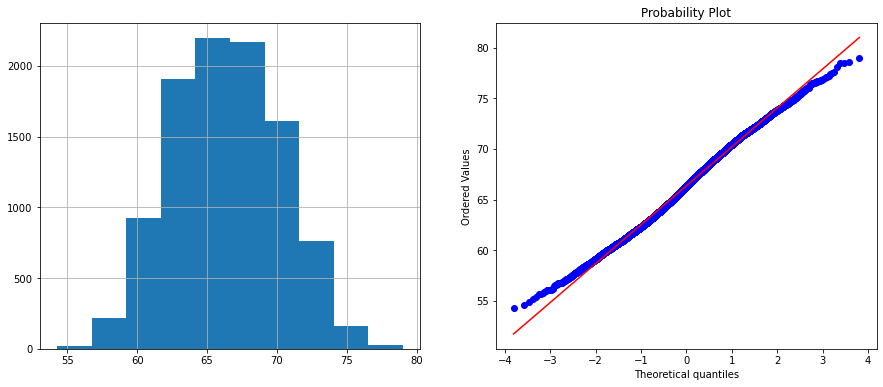

In [21]:
diagnostic_plot(data,'Height')

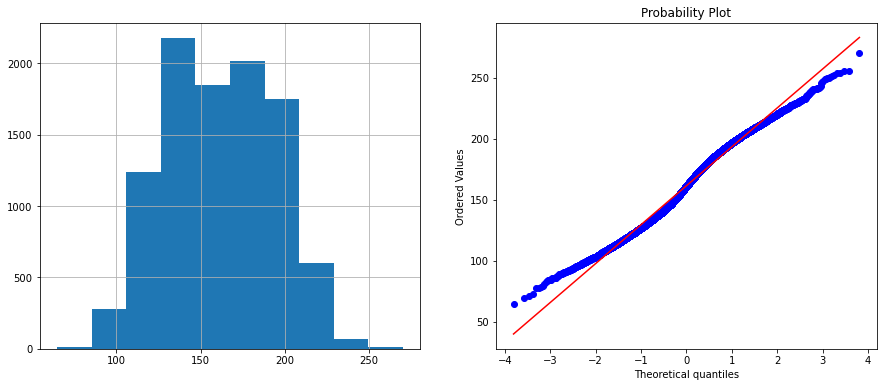

In [22]:
diagnostic_plot(data,'Weight')

## Logarithmic Transformation

In [23]:
data['Log_height'] = np.log(data["Height"]+1)
#data['Log_weight'] = np.log(data["weight"]+1)

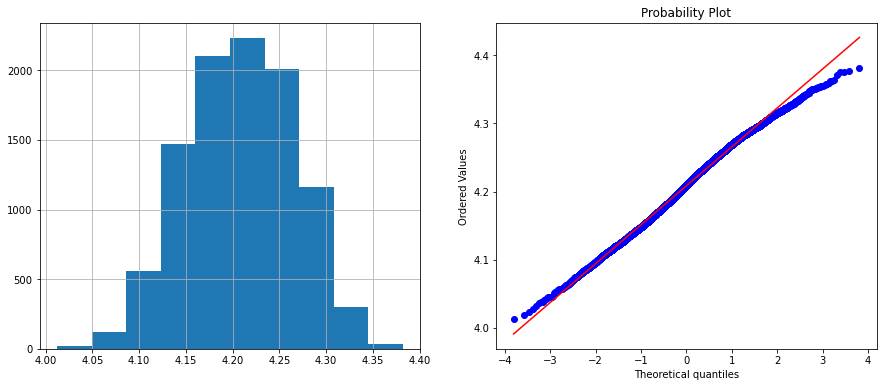

In [24]:
diagnostic_plot(data,'Log_height')

## Reciprocal Transformation

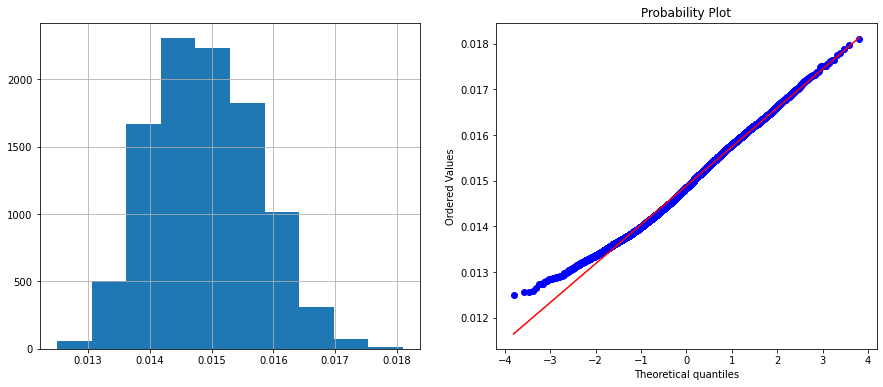

In [25]:
data['rec_height'] = 1/(data['Height']+1)
diagnostic_plot(data,'rec_height')

## Sqaure Root Transformation

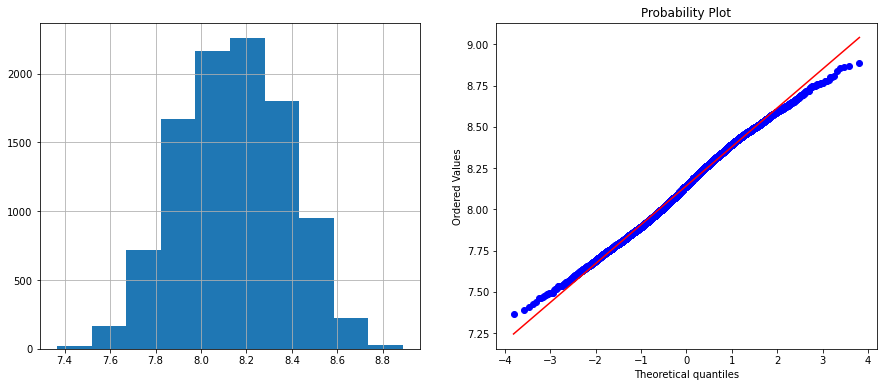

In [26]:
data['sr_height'] = data['Height']**(1/2)
diagnostic_plot(data, 'sr_height')

## Exponential Transformation

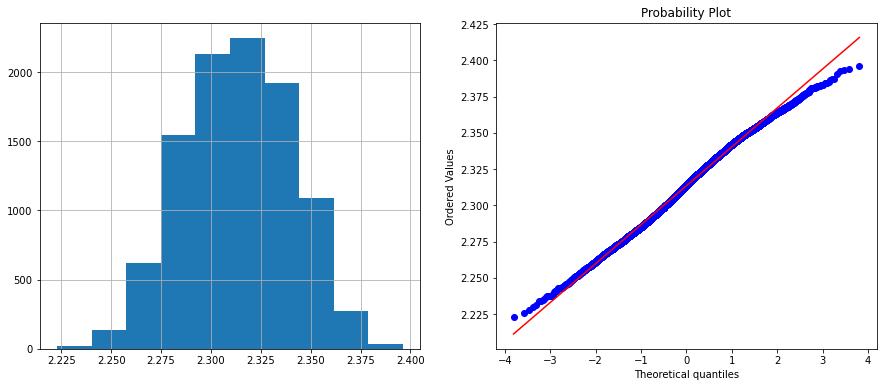

In [30]:
data['exp_height'] = data['Height']**(1/5)
diagnostic_plot(data,'exp_height')

In [31]:
data

,Gender,Height,Weight,Log_height,rec_height,sr_height,exp_height
0,Male,73.847017,241.893563,4.315446,0.013361,8.593429,2.364104
1,Male,68.781904,162.310473,4.245375,0.014330,8.293486,2.330745
2,Male,74.110105,212.740856,4.318955,0.013314,8.608723,2.365786
3,Male,71.730978,220.042470,4.286767,0.013749,8.469414,2.350398
4,Male,69.881796,206.349801,4.261014,0.014108,8.359533,2.338152
...,...,...,...,...,...,...,...
9995,Female,66.172652,136.777454,4.207266,0.014887,8.134657,2.312787
9996,Female,67.067155,170.867906,4.220495,0.014691,8.189454,2.319007
9997,Female,63.867992,128.475319,4.172354,0.015416,7.991745,2.296448
9998,Female,69.034243,163.852461,4.248984,0.014279,8.308685,2.332453


## BoxCox Transformation

Optimal lamda: 0.5821208201180479


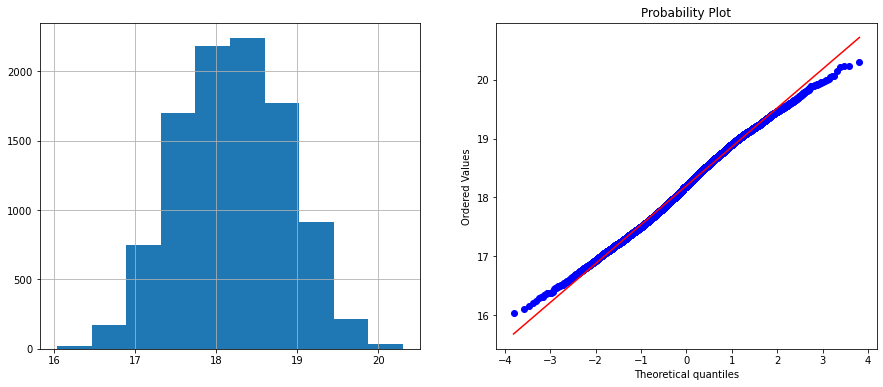

In [34]:
data['boxcox_height'], param = stats.boxcox(data.Height+1)
print('Optimal lamda:', param)
diagnostic_plot(data,'boxcox_height')